Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, RandomizedSearchCV, KFold
from sklearn.linear_model import LogisticRegression, LinearRegression, SGDRegressor
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, BaggingClassifier, RandomForestRegressor
from sklearn.svm import LinearSVC, SVR
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import ConfusionMatrixDisplay, f1_score, make_scorer, confusion_matrix, mean_squared_error, mean_absolute_error

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

from xgboost import XGBClassifier, XGBRegressor
from catboost import CatBoostClassifier

from scipy.stats import randint, uniform

### Import Datasets


In [2]:
raw_data = pd.read_csv("datesets\car_insurance_claim.csv")

<>:1: SyntaxWarning: invalid escape sequence '\c'
<>:1: SyntaxWarning: invalid escape sequence '\c'
C:\Users\EliteX\AppData\Local\Temp\ipykernel_312\105344271.py:1: SyntaxWarning: invalid escape sequence '\c'
  raw_data = pd.read_csv("datesets\car_insurance_claim.csv")


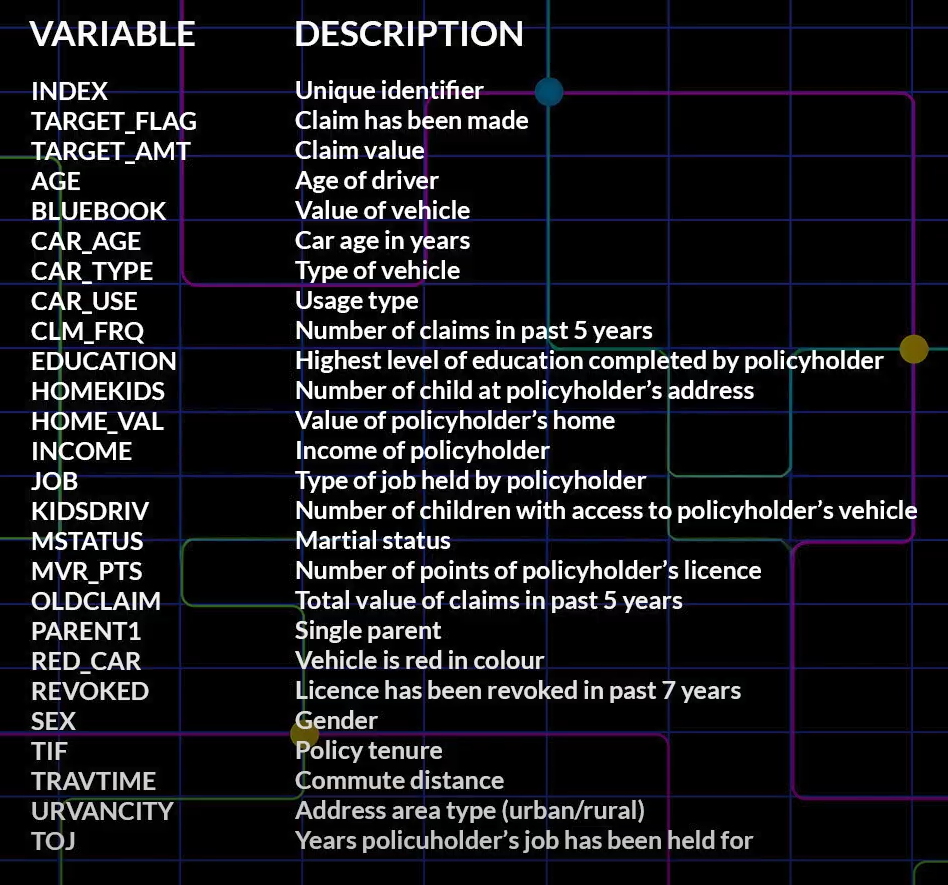

In [3]:
raw_data

,ID,KIDSDRIV,BIRTH,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,...,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CLM_AMT,CAR_AGE,CLAIM_FLAG,URBANICITY
0,63581743,0,16MAR39,60.0,0,11.0,"$67,349",No,$0,z_No,...,Minivan,yes,"$4,461",2,No,3,$0,18.0,0,Highly Urban/ Urban
1,132761049,0,21JAN56,43.0,0,11.0,"$91,449",No,"$257,252",z_No,...,Minivan,yes,$0,0,No,0,$0,1.0,0,Highly Urban/ Urban
2,921317019,0,18NOV51,48.0,0,11.0,"$52,881",No,$0,z_No,...,Van,yes,$0,0,No,2,$0,10.0,0,Highly Urban/ Urban
3,727598473,0,05MAR64,35.0,1,10.0,"$16,039",No,"$124,191",Yes,...,z_SUV,no,"$38,690",2,No,3,$0,10.0,0,Highly Urban/ Urban
4,450221861,0,05JUN48,51.0,0,14.0,NaN,No,"$306,251",Yes,...,Minivan,yes,$0,0,No,0,$0,6.0,0,Highly Urban/ Urban
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10297,67790126,1,13AUG54,45.0,2,9.0,"$164,669",No,"$386,273",Yes,...,Minivan,no,$0,0,No,2,$0,17.0,0,Highly Urban/ Urban
10298,61970712,0,17JUN53,46.0,0,9.0,"$107,204",No,"$332,591",Yes,...,Panel Truck,no,$0,0,No,0,$0,1.0,0,Highly Urban/ Urban
10299,849208064,0,18JUN51,48.0,0,15.0,"$39,837",No,"$170,611",Yes,...,z_SUV,no,$0,0,No,0,$0,1.0,0,Highly Urban/ Urban
10300,627828331,0,12DEC48,50.0,0,7.0,"$43,445",No,"$149,248",Yes,...,Minivan,no,$0,0,No,0,$0,11.0,0,Highly Urban/ Urban


## Data Cleaning

In [8]:
data_df = raw_data.copy()


In [11]:
col_names = {
    'KIDSDRIV': 'num_young_drivers',
    'BIRTH': 'date_of_birth',
    'AGE': 'age',
    'HOMEKIDS': 'num_of_children',
    'YOJ': 'years_on_job',
    'INCOME': 'income',
    'PARENT1': 'single_parent',
    'HOME_VAL': 'home_value',
    'MSTATUS': 'married',
    'GENDER': 'gender',
    'EDUCATION': 'highest_education_level',
    'OCCUPATION': 'occupation',
    'TRAVTIME': 'commute_distance',
    'CAR_USE': 'type_of_use',
    'BLUEBOOK': 'vehicle_value',
    'TIF': 'policy_tenure',
    'CAR_TYPE': 'vehicle_type',
    'RED_CAR': 'red_vehicle',
    'OLDCLAIM': '5_year_total_claim_value',
    'CLM_FREQ': '5_year_number_of_claims',
    'REVOKED': 'license_revoked',
    'MVR_PTS': 'license_points',
    'CAR_AGE': 'vehicle_age',
    'CLAIM_FLAG': 'is_claim',
    'URBANCITY': 'address_type'
} 

#update col names
data_df.rename(columns=col_names, inplace=True)

In [12]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10302 entries, 0 to 10301
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        10302 non-null  int64  
 1   num_young_drivers         10302 non-null  int64  
 2   date_of_birth             10302 non-null  object 
 3   age                       10295 non-null  float64
 4   num_of_children           10302 non-null  int64  
 5   years_on_job              9754 non-null   float64
 6   income                    9732 non-null   object 
 7   single_parent             10302 non-null  object 
 8   home_value                9727 non-null   object 
 9   married                   10302 non-null  object 
 10  gender                    10302 non-null  object 
 11  highest_education_level   10302 non-null  object 
 12  occupation                9637 non-null   object 
 13  commute_distance          10302 non-null  int64  
 14  type_o